In [ ]:
!pip install scipy
!pip install datetime
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install fbprophet


             Date Country  Confirmed  Recovered  Deaths
52716  2020-10-16      US    8028392    3197539  218931
52717  2020-10-17      US    8085465    3220573  219676
52718  2020-10-18      US    8134804    3234138  220104
52719  2020-10-19      US    8201387    3272603  220569
52720  2020-10-20      US    8262326    3295148  221509
52721  2020-10-21      US    8324960    3323354  222627
52722  2020-10-22      US    8397618    3353056  223502
52723  2020-10-23      US    8480161    3375427  224442
52724  2020-10-24      US    8564037    3406656  225382
52725  2020-10-25      US    8625984    3422878  225760
52726  2020-10-26      US    8691979    3460455  226267
52727  2020-10-27      US    8767572    3487666  227242
52728  2020-10-28      US    8845830    3518140  228244
52729  2020-10-29      US    8936033    3554336  229217
52730  2020-10-30      US    9033829    3578452  230235
52731  2020-10-31      US    9122666    3612478  231125
52732  2020-11-01      US    9199122    3630579 

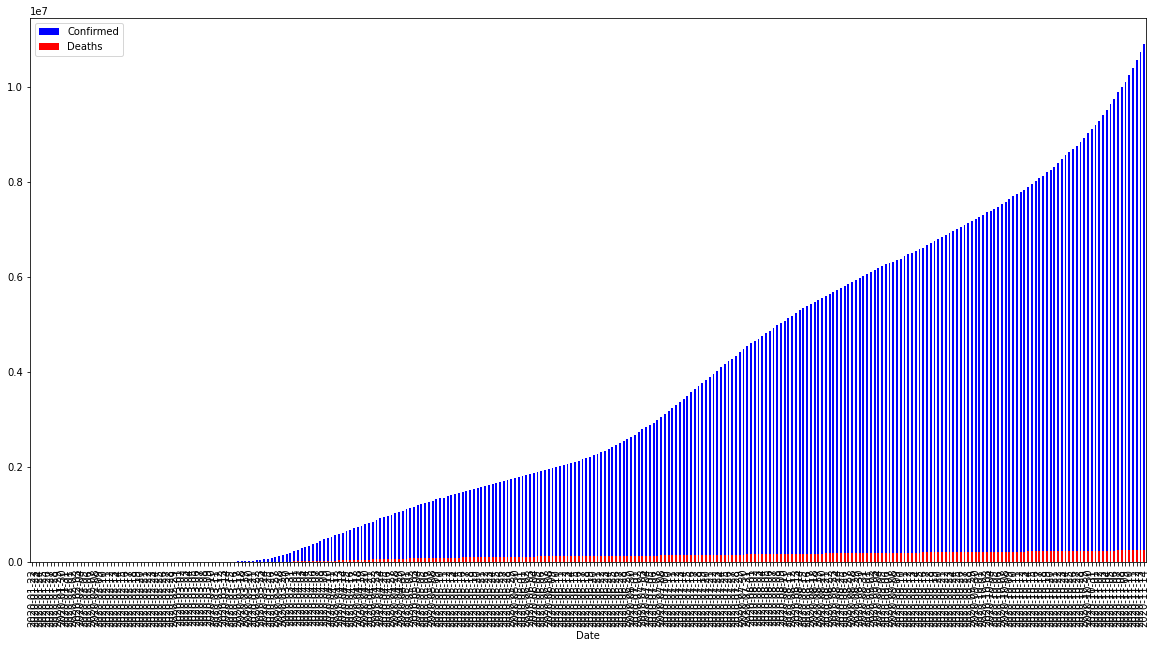

297<-- Records so far....may be one less than actual days since pandemic began....


In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import datetime

#### ----- Step 1 (Download data)----
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)

df_us = df1[df1['Country']=='US']
print(df_us.tail(30))
df_us_per_day = df_us.groupby('Date')[['Confirmed','Recovered','Deaths']].sum()
#### ----- Step 3 (Plot data)----
# Increase size of plot
plt.rcParams["figure.figsize"]=20,10  # Remove if not on Jupyter
# Plot column 'Confirmed'
df_us.plot(kind = 'bar', x = 'Date', y = 'Confirmed', color = 'blue')

ax1 = plt.gca()
df_us.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red', ax = ax1)
plt.show()


#how many days into the future we are projecting
forecast_periods = 120

most_recent_date_string = df_us.Date.max()
initial_date_string = df_us.Date.min()
most_recent_date_number = len(df_us.index)
#######
###This is one of 2 methods in this code that does the same thing (sort of...)
### This calculates time span (in days) beween first and last date in dataset.
def days_in_time_span(d1, d2):
    #first day
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    #last day / most recent day in records used in this project
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    #return absolute value of difference IN DAYS for --> (most recent day - first day)
    return abs((d2 - d1).days)
#total_days_in_data is a var referencing the above calculation....
total_days_in_data = days_in_time_span(initial_date_string, most_recent_date_string)
#print total days calculated by this method
print(str(total_days_in_data) +"<-- Records so far....may be one less than actual days since pandemic began....")

days_into_pandemic = total_days_in_data

In [ ]:

df_us_per_day

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
...,...,...,...
2020-11-10,10256094,3961873,240589
2020-11-11,10399325,3997175,241977
2020-11-12,10560111,4051256,243194


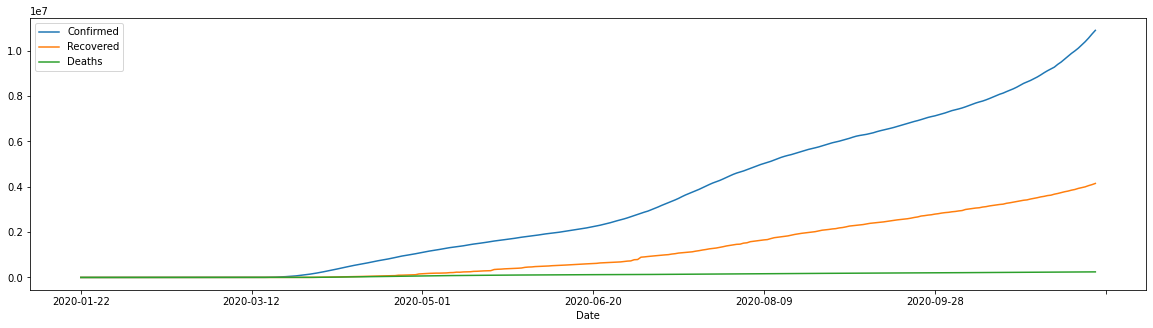

In [ ]:
df_us_per_day.plot(kind='line',figsize=(20,5))

In [ ]:
us_cases = df_us_per_day.reset_index()


In [ ]:
confirmed_cases = us_cases[['Date','Confirmed']]
recovered_cases = us_cases[['Date','Recovered']]
death_cases = us_cases[['Date','Deaths']]

In [ ]:
death_cases.rename(columns={'Date':'ds','Deaths':'y'},inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

train.tail()

In [ ]:

from fbprophet import Prophet
m= Prophet()

train = death_cases[:days_into_pandemic]
test = death_cases[days_into_pandemic:]
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(train)
future_dates = m.make_future_dataframe(periods=180)


future = future_dates


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


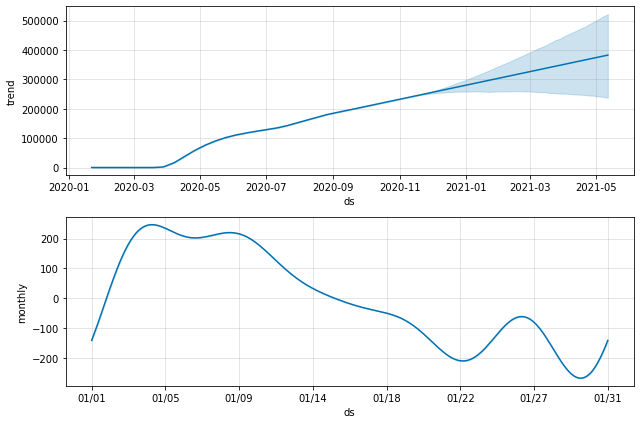

In [ ]:
df = death_cases
forecast = m.predict(future)
fig = m.plot_components(forecast)

Text(41.375, 0.5, 'Deaths from Covid-19')

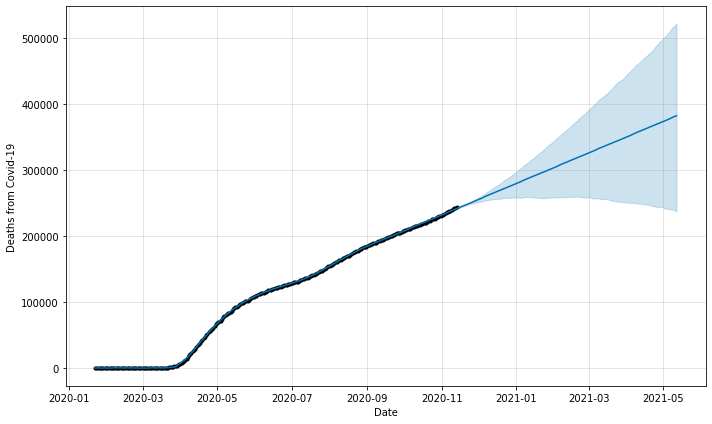

In [ ]:
import matplotlib.pyplot as plt

m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Deaths from Covid-19')


In [ ]:
df_us

,Date,Country,Confirmed,Recovered,Deaths
52448,2020-01-22,US,1,0,0
52449,2020-01-23,US,1,0,0
52450,2020-01-24,US,2,0,0
52451,2020-01-25,US,2,0,0
52452,2020-01-26,US,5,0,0
...,...,...,...,...,...
52741,2020-11-10,US,10256094,3961873,240589
52742,2020-11-11,US,10399325,3997175,241977
52743,2020-11-12,US,10560111,4051256,243194
52744,2020-11-13,US,10737335,4095146,244332


In [ ]:
forecast[days_into_pandemic:days_into_pandemic+30]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
297,2020-11-14,242317.682489,241880.481985,243137.552239,242317.682489,242317.682489,172.979027,172.979027,172.979027,172.979027,172.979027,172.979027,0.0,0.0,0.0,242490.661516
298,2020-11-15,243100.013147,242582.849615,243846.072117,243100.013147,243100.013147,120.697697,120.697697,120.697697,120.697697,120.697697,120.697697,0.0,0.0,0.0,243220.710843
299,2020-11-16,243882.343804,243227.014432,244620.874310,243865.807292,243901.903930,71.654129,71.654129,71.654129,71.654129,71.654129,71.654129,0.0,0.0,0.0,243953.997934
300,2020-11-17,244664.674462,244001.637964,245383.284636,244561.348814,244750.250447,34.817990,34.817990,34.817990,34.817990,34.817990,34.817990,0.0,0.0,0.0,244699.492451
301,2020-11-18,245447.005119,244705.601426,246175.836851,245215.449409,245629.399176,7.927064,7.927064,7.927064,7.927064,7.927064,7.927064,0.0,0.0,0.0,245454.932183
302,2020-11-19,246229.335776,245413.056716,246978.707626,245867.246634,246534.119260,-13.754198,-13.754198,-13.754198,-13.754198,-13.754198,-13.754198,0.0,0.0,0.0,246215.581579
303,2020-11-20,247011.666434,246023.514649,247824.408387,246467.147511,247462.941069,-31.031440,-31.031440,-31.031440,-31.031440,-31.031440,-31.031440,0.0,0.0,0.0,246980.634994
304,2020-11-21,247793.997091,246722.767185,248665.461239,247040.153669,248400.302252,-44.303459,-44.303459,-44.303459,-44.303459,-44.303459,-44.303459,0.0,0.0,0.0,247749.693633
305,2020-11-22,248576.327749,247318.777062,249584.121273,247634.582323,249340.490245,-60.554731,-60.554731,-60.554731,-60.554731,-60.554731,-60.554731,0.0,0.0,0.0,248515.773017
306,2020-11-23,249358.658406,247963.589124,250385.355793,248178.496032,250318.961049,-91.478712,-91.478712,-91.478712,-91.478712,-91.478712,-91.478712,0.0,0.0,0.0,249267.179694


In [ ]:

forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,119.396090,-547.078768,696.160595,119.396090,119.396090,-60.554731,-60.554731,-60.554731,-60.554731,-60.554731,-60.554731,0.0,0.0,0.0,58.841359
1,2020-01-23,111.703445,-615.720592,657.103957,111.703445,111.703445,-91.478712,-91.478712,-91.478712,-91.478712,-91.478712,-91.478712,0.0,0.0,0.0,20.224732
2,2020-01-24,104.010799,-583.325780,593.963231,104.010799,104.010799,-140.284143,-140.284143,-140.284143,-140.284143,-140.284143,-140.284143,0.0,0.0,0.0,-36.273344
3,2020-01-25,96.318154,-712.101265,565.904690,96.318154,96.318154,-190.167839,-190.167839,-190.167839,-190.167839,-190.167839,-190.167839,0.0,0.0,0.0,-93.849686
4,2020-01-26,88.625508,-795.372515,471.502026,88.625508,88.625508,-210.571630,-210.571630,-210.571630,-210.571630,-210.571630,-210.571630,0.0,0.0,0.0,-121.946123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2021-05-08,379225.547541,240594.918879,514999.575845,240074.573772,514631.211805,162.828284,162.828284,162.828284,162.828284,162.828284,162.828284,0.0,0.0,0.0,379388.375825
473,2021-05-09,380007.878199,239842.845727,517258.337320,239340.037252,515879.858108,237.161768,237.161768,237.161768,237.161768,237.161768,237.161768,0.0,0.0,0.0,380245.039967
474,2021-05-10,380790.208856,239019.062025,517837.811682,238575.520160,517461.201400,242.476961,242.476961,242.476961,242.476961,242.476961,242.476961,0.0,0.0,0.0,381032.685817
475,2021-05-11,381572.539513,238340.851734,520202.801860,237885.075683,519766.603090,217.449396,217.449396,217.449396,217.449396,217.449396,217.449396,0.0,0.0,0.0,381789.988909


In [ ]:
forecast.tail

<bound method NDFrame.tail of             ds          trend  ...  multiplicative_terms_upper           yhat
0   2020-01-22     119.396090  ...                         0.0      58.841359
1   2020-01-23     111.703445  ...                         0.0      20.224732
2   2020-01-24     104.010799  ...                         0.0     -36.273344
3   2020-01-25      96.318154  ...                         0.0     -93.849686
4   2020-01-26      88.625508  ...                         0.0    -121.946123
..         ...            ...  ...                         ...            ...
472 2021-05-08  379225.547541  ...                         0.0  379388.375825
473 2021-05-09  380007.878199  ...                         0.0  380245.039967
474 2021-05-10  380790.208856  ...                         0.0  381032.685817
475 2021-05-11  381572.539513  ...                         0.0  381789.988909
476 2021-05-12  382354.870171  ...                         0.0  382557.294777

[477 rows x 16 columns]>